# Porting napari-assistant generated notebooks to run in google colab
In this notebook we demonstrate how to modify a jupyter notebook that was generated using the [napari-assistant](https://github.com/haesleinhuepf/napari-assistant) and using [pyclesperanto-prototype](https://github.com/clesperanto/pyclesperanto_prototype) to make it run in google colab.

[You can try this out in google colab directly](https://github.com/zoccoler/GPU_Accelerated_Image_Processing_on_Cloud_NEUBIAS_Defragmentation_TS2_2023/blob/main/notebooks/assistant_notebook_colab.ipynb) and skip the preparation listed below.

## Preparation

* Install [devbio-napari](https://github.com/haesleinhuepf/devbio-napari) on your local computer using conda. TL;DR

```
conda install mamba -c conda-forge
mamba create --name devbio-napari-env python=3.9 devbio-napari -c conda-forge

conda activate devbio-napari-env
naparia
```

Note: the `a` at the end of `naparia` is no typo. This opens the napari-assistant.

* Download and open the blobs image from https://github.com/zoccoler/GPU_Accelerated_Image_Processing_on_Cloud_NEUBIAS_Defragmentation_TS2_2023/raw/main/data/blobs.tif

* After opening the dataset in the napari-assistant, click on the buttons `Remove background` (1) and `Label` (2). Feel free to modify the numeric parameters in the bootom right of the screen. Afterwards click on the `Generate code...` (3) button and `Export Jupyter Notebook` (4). Upload this notebook to google colab and open it.

## Getting a GPU

Before executing this notebook in google colab, please swith the runtime to `GPU`. After that, at the top-right, click on 'Connect'.

<img src="https://github.com/BiAPoL/blog/raw/master/docs/robert_haase/clesperanto_google_colab/clesperanto_colab/colab2.png" width="500">

Additionally now, also at the top-right, you should see two very small graphs named  'RAM' and 'Disk'. Click on them to better visualize what computational resources are available for you.

## Installing additional packages

Google colab environment already comes with some popular scientific packages. In case you need to install extra packages to the environment, you can do so with `pip` as shown below.

**So, if running this from google colab**, execute the cell below. It installs [pyclesperanto-prototype](https://github.com/clEsperanto/pyclesperanto_prototype#py-clesperanto) into your colab kernel.

In [1]:
!pip install pyclesperanto_prototype

## Running the generated code 
Compare the notebook generated from the assistant to the one shown here below. Only minor modifications regarding where to load the  data from are necessary to run the notebook in google colab.

### Importing packages

In [2]:
from skimage.io import imread
import pyclesperanto_prototype as cle

*Notice: due to a recent [opencl support on Google colab issue](https://github.com/clEsperanto/pyclesperanto_prototype/issues/300), it is necessary to change the backend to 'cupy' as done by running the cell below.*

In [3]:
# If in google colab, use cupy backend for now
cle.select_device("cupy")

'cupy backend (experimental)'

### Loading 'Lund_000500_resampled-cropped'

/usr/local/lib/python3.10/dist-packages/pyclesperanto_prototype/_tier0/_cuda_backend.py:39: UserWarning: clesperanto's cupy / CUDA backend is experimental. Please use it with care. The following functions are known to cause issues in the CUDA backend:
affine_transform, apply_vector_field, create(uint64), create(int32), create(int64), resample, scale, spots_to_pointlist
  warnings.warn("clesperanto's cupy / CUDA backend is experimental. Please use it with care. The following functions are known to cause issues in the CUDA backend:\n" +


experimental clesperanto CUDAArray([[ 40.  32.  24. ... 216. 200. 200.]
 [ 56.  40.  24. ... 232. 216. 216.]
 [ 64.  48.  24. ... 240. 232. 232.]
 ...
 [ 72.  80.  80. ...  48.  48.  48.]
 [ 80.  80.  80. ...  48.  48.  48.]
 [ 96.  88.  80. ...  48.  48.  48.]], dtype=float32)
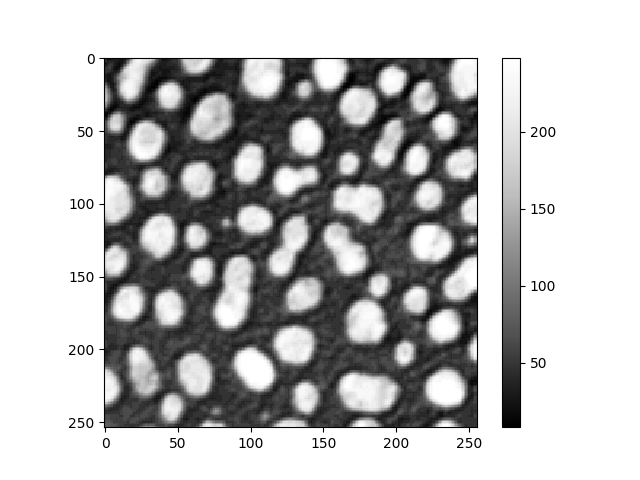
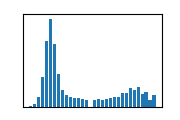

In [4]:
# originally generated code:
# image0_L0r = imread("C:/structure/code/clEsperanto/napari_pyclesperanto_assistant/data/blobs.tif")
# image0_L0r

# modified version for google colab
image0_L0r = cle.asarray(imread('https://github.com/zoccoler/GPU_Accelerated_Image_Processing_on_Cloud_NEUBIAS_Defragmentation_TS2_2023/raw/main/data/blobs.tif', plugin='tifffile'))

image0_L0r

### top hat box

experimental clesperanto CUDAArray([[ 24.  16.   8. ... 152. 136. 136.]
 [ 40.  24.   8. ... 168. 152. 152.]
 [ 48.  32.   8. ... 176. 168. 168.]
 ...
 [ 40.  48.  48. ...  16.  16.  16.]
 [ 48.  48.  48. ...  16.  16.  16.]
 [ 64.  56.  48. ...  16.  16.  16.]], dtype=float32)
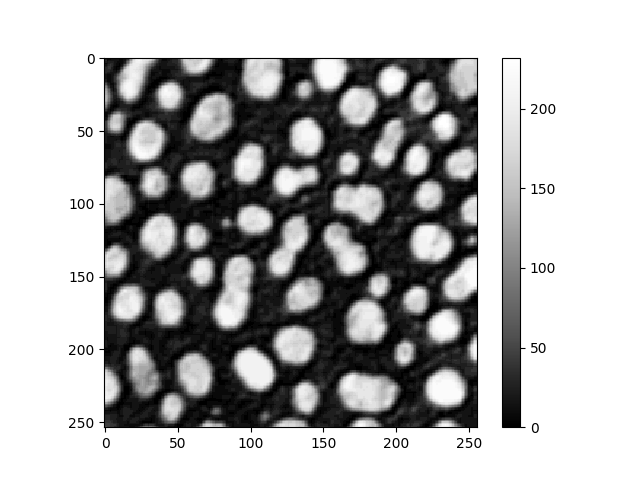
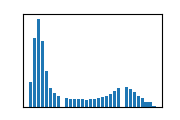

In [5]:
image1_thb = cle.top_hat_box(image0_L0r, None, 15.0, 15.0, 0.0)
image1_thb

### voronoi otsu labeling

experimental clesperanto CUDAArray([[ 0  0  0 ... 62 62 62]
 [ 0  0  0 ... 62 62 62]
 [ 0  0  0 ... 62 62 62]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]], dtype=uint32)
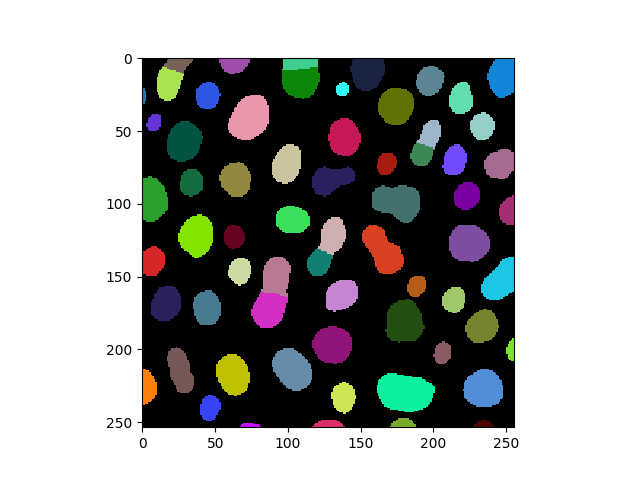

In [9]:
image2_vol = cle.voronoi_otsu_labeling(image1_thb, None, 4.0, 2.0)
image2_vol

## Saving Results


### Connecting google drive
For saving image processing results to our google drive, we need to connect to it:


In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


The procedure involves creating an authorization code. 
In order to generate it, click on the provided link and follow the instructions.
See more detailed instructions [here](https://biapol.github.io/blog/robert_haase/clesperanto_google_colab/readme.html#step-5-connecting-google-drive).


### Saving Results to google drive

In [11]:
from skimage.io import imsave
imsave('/content/gdrive/My Drive/labels_blobs.tif', cle.pull(image2_vol))

<ipython-input-11-40ecded39b39>:2: UserWarning: /content/gdrive/My Drive/labels_blobs.tif is a low contrast image
  imsave('/content/gdrive/My Drive/labels_blobs.tif', cle.pull(image2_vol))
